<a href="https://colab.research.google.com/github/bdbiworkshops/analysis-intro-to-pytorch/blob/main/AnalysisWorkshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Workshop 2: Data Preprocessing + Intro to PyTorch!

In the first half of this workshop, we will delve into preprocessing methods using Pandas. In the second half we'll use Pytorch to begin creating a neural network to predict the number of rainy days in any given month in Atlanta.

## Libraries and Tools:

If you need to brush up on some machine learning and numpy + pandas fundamentals, check out our first tutorial using Sklearn here: https://github.com/bdbiworkshops/analysis-bees-vs-wasps/blob/main/AnalysisWorkshop1.ipynb
<br><br>
For today's workshop, we'll mostly be using Pandas and Pytorch.

Pytorch: A machine learning framework that is better adapted for deep learning compared to Sklearn (beginner guide: https://pytorch.org/tutorials/beginner/basics/intro.html)

Pandas: Used for easily working with datasets (intro to pandas: https://pandas.pydata.org/docs/user_guide/10min.html)

Matplotlib: Widely used data visualization library (examples: https://matplotlib.org/stable/gallery/index.html)

Google Colab + Jupyter Notebooks: Software used to easily share code with tools for documentation

## Imports + Loading Data

We will be using weather data recorded at the Hartsfield-Jackson Atlanta International Airport. The dataset was retrieved from the National Oceanic and Atmospheric Administration and is available for download at https://github.com/bdbiworkshops/analysis-intro-to-pytorch/blob/main/3474978.csv.

In [ ]:
## imports
import torch
from torch import nn
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
%%bash
git clone https://github.com/bdbiworkshops/analysis-intro-to-pytorch.git

Cloning into 'analysis-intro-to-pytorch'...


In [ ]:
file = '/content/analysis-intro-to-pytorch/3474978.csv'
data = pd.read_csv(file)

<ipython-input-3-fd1ada61f91f>:2: DtypeWarning: Columns (35,36,42,43,44,50,52,74,76,77,90) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


## Data Preprocessing

In [ ]:
# [LIVE] prints first 5 lines of dataset, but omitts columns for space

       STATION                 DATE REPORT_TYPE  SOURCE  AWND  \
0  72219013874  2018-01-01T00:52:00       FM-15       7   NaN   
1  72219013874  2018-01-01T01:00:00       FM-12       4   NaN   
2  72219013874  2018-01-01T01:52:00       FM-15       7   NaN   
3  72219013874  2018-01-01T02:34:00       FM-16       7   NaN   
4  72219013874  2018-01-01T02:52:00       FM-15       7   NaN   

   BackupDirection  BackupDistance  BackupDistanceUnit  BackupElements  \
0              NaN             NaN                 NaN             NaN   
1              NaN             NaN                 NaN             NaN   
2              NaN             NaN                 NaN             NaN   
3              NaN             NaN                 NaN             NaN   
4              NaN             NaN                 NaN             NaN   

   BackupElevation  ...  ShortDurationPrecipitationValue045  \
0              NaN  ...                                 NaN   
1              NaN  ...               

In [ ]:
## regular .head() only shows us 20 out of the 124 columns
## instead, we'll set a parameter 'display.max_columns' to None (as in, no column restrictions) to help us see all the columns

pd.set_option('display.max_columns', None) #displays first 5 rows with all columns

## To print the entire dataset (personally do not recommend - view it in Excel instead)
#pd.set_option('display.max_rows', None)
#print(data)

print(data.head())

#[LIVE] gives dataset dimensions in the format (rows, columns)

       STATION                 DATE REPORT_TYPE  SOURCE  AWND  \
0  72219013874  2018-01-01T00:52:00       FM-15       7   NaN   
1  72219013874  2018-01-01T01:00:00       FM-12       4   NaN   
2  72219013874  2018-01-01T01:52:00       FM-15       7   NaN   
3  72219013874  2018-01-01T02:34:00       FM-16       7   NaN   
4  72219013874  2018-01-01T02:52:00       FM-15       7   NaN   

   BackupDirection  BackupDistance  BackupDistanceUnit  BackupElements  \
0              NaN             NaN                 NaN             NaN   
1              NaN             NaN                 NaN             NaN   
2              NaN             NaN                 NaN             NaN   
3              NaN             NaN                 NaN             NaN   
4              NaN             NaN                 NaN             NaN   

   BackupElevation  BackupElevationUnit  BackupEquipment  BackupLatitude  \
0              NaN                  NaN              NaN             NaN   
1           

In [ ]:
## Alternatively, you can just print the column names
print(data.columns.tolist())

['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'AWND', 'BackupDirection', 'BackupDistance', 'BackupDistanceUnit', 'BackupElements', 'BackupElevation', 'BackupElevationUnit', 'BackupEquipment', 'BackupLatitude', 'BackupLongitude', 'BackupName', 'CDSD', 'CLDD', 'DSNW', 'DYHF', 'DYTS', 'DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity', 'DailyAverageSeaLevelPressure', 'DailyAverageStationPressure', 'DailyAverageWetBulbTemperature', 'DailyAverageWindSpeed', 'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature', 'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemperature', 'DailyMinimumDryBulbTemperature', 'DailyPeakWindDirection', 'DailyPeakWindSpeed', 'DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall', 'DailySustainedWindDirection', 'DailySustainedWindSpeed', 'DailyWeather', 'HDSD', 'HTDD', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPresentWeatherType', 

From running pandas.head(), we can see that we have 124 columns to work with. Thankfully, for our purposes we won't be needing to use all of those columns, so we'll start removing the irrelevant ones.

In [ ]:
## Note that the dataset contains columns for hourly, daily, and monthly recordings
## Since we only want monthly data, we'll drop the rest of the columns
## Additionally, we'll drop all columns with NaN (not a number) values for monthly recordings


## Because we have less columns we want to keep than drop, we'll use .loc to preserve the columns we want
# usually to drop specific columns you would use .drop()
data = data[['DATE','MonthlyDewpointTemperature', 'MonthlyDaysWithGT001Precip', 'MonthlyDaysWithGT010Precip', 'MonthlyDaysWithGT32Temp', 'MonthlyDaysWithGT90Temp', 'MonthlyDaysWithLT0Temp', 'MonthlyDaysWithLT32Temp', 'MonthlyDepartureFromNormalAverageTemperature', 'MonthlyDepartureFromNormalCoolingDegreeDays', 'MonthlyDepartureFromNormalHeatingDegreeDays', 'MonthlyDepartureFromNormalMaximumTemperature', 'MonthlyDepartureFromNormalMinimumTemperature', 'MonthlyMaxSeaLevelPressureValue', 'MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinSeaLevelPressureValue', 'MonthlyMinimumTemperature', 'MonthlySeaLevelPressure', 'MonthlyStationPressure', 'MonthlyTotalLiquidPrecipitation']]

## [LIVE] How can we drop all the rows prior to the monthly measurements?

print(data.head())

## [LIVE] What should we do for a column with a lot of NaNs?
dpmap = {'MonthlyDewpointTemperature': ??????}
data.fillna(value= ?????? , inplace=True)
print(data.head())

## [LIVE] Remove 'MonthlyDewpointTemperature' column, since it's mostly/all NaNs

print(data.head())

                     DATE  MonthlyDaysWithGT001Precip  \
1053  2018-01-31T23:59:00                         9.0   
2171  2018-02-28T23:59:00                        18.0   
3237  2018-03-31T23:59:00                        10.0   
4293  2018-04-30T23:59:00                         9.0   
5438  2018-05-31T23:59:00                        15.0   

      MonthlyDaysWithGT010Precip  MonthlyDaysWithGT32Temp  \
1053                         5.0                     19.0   
2171                         8.0                      2.0   
3237                         8.0                      2.0   
4293                         6.0                      0.0   
5438                         9.0                      0.0   

      MonthlyDaysWithGT90Temp  MonthlyDaysWithLT0Temp  \
1053                      0.0                     0.0   
2171                      0.0                     0.0   
3237                      0.0                     0.0   
4293                      0.0                     0.0   
5438 

<ipython-input-7-54e27bf80413>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(value=-1, inplace=True)


In [ ]:
print(data.shape)

(60, 20)


Next, we'll combine the columns 'MonthlyDaysWithGT001Precip' and 'MonthlyDaysWithGT010Precip' to give us the total number of rainy days per month.

In [ ]:
## [LIVE] First, we'll insert a new column to store the sum:
data.insert(1, "MonthlyDaysWithPrecip", ??????)

## Now we can drop the columns we just added since we don't need them anymore:
data = data.drop(columns=['MonthlyDaysWithGT001Precip', 'MonthlyDaysWithGT010Precip'])

print(data.head())

                     DATE  MonthlyDaysWithPrecip  MonthlyDaysWithGT32Temp  \
1053  2018-01-31T23:59:00                   14.0                     19.0   
2171  2018-02-28T23:59:00                   26.0                      2.0   
3237  2018-03-31T23:59:00                   18.0                      2.0   
4293  2018-04-30T23:59:00                   15.0                      0.0   
5438  2018-05-31T23:59:00                   24.0                      0.0   

      MonthlyDaysWithGT90Temp  MonthlyDaysWithLT0Temp  \
1053                      0.0                     0.0   
2171                      0.0                     0.0   
3237                      0.0                     0.0   
4293                      0.0                     0.0   
5438                      3.0                     0.0   

      MonthlyDaysWithLT32Temp  MonthlyDepartureFromNormalAverageTemperature  \
1053                      2.0                                          -2.9   
2171                      0.0       

#### One Hot Encoding
Now, we come to the question of what to do with our 'DATE' column. It's a string datatype that includes the year, month, day, hour, and minute at which the measurement was taken. Since all we want to know is the month, we'll first need to extract the specific indices of the string that correspond to month. After this, we'll use a principle known as one hot encoding to create columns corresponding to each month. Each columns which will store a boolean value indicating 1 if the date corresponds to the month, and 0 otherwise.

In [ ]:
## slicing 'DATE' column
data['DATE'] = data['DATE'].str.slice(start=5, stop=7)

print(data['DATE'].head())

1053    01
2171    02
3237    03
4293    04
5438    05
Name: DATE, dtype: object


In [ ]:
## One Hot Encoding

data = pd.get_dummies(data, columns=['DATE'])
print(data.head())

      MonthlyDaysWithPrecip  MonthlyDaysWithGT32Temp  MonthlyDaysWithGT90Temp  \
1053                   14.0                     19.0                      0.0   
2171                   26.0                      2.0                      0.0   
3237                   18.0                      2.0                      0.0   
4293                   15.0                      0.0                      0.0   
5438                   24.0                      0.0                      3.0   

      MonthlyDaysWithLT0Temp  MonthlyDaysWithLT32Temp  \
1053                     0.0                      2.0   
2171                     0.0                      0.0   
3237                     0.0                      0.0   
4293                     0.0                      0.0   
5438                     0.0                      0.0   

      MonthlyDepartureFromNormalAverageTemperature  \
1053                                          -2.9   
2171                                          10.1   
3237    

In [ ]:
print(data.shape)

(60, 30)


Now we're ready to move onto building the model using Pytorch!

## Building the Model with PyTorch

### But First, What's a Tensor?

If you're familiar with Python, you might know about NumPy ndarrays (N-Dimensional Arrays) - these are very similar to tensors. Arrays and matrices are the foundation of machine learning and allow us to "translate" datasets into readable inputs/outputs and optimize predictions. We will be using tensors for the rest of this tutorial.

###Converting from Pandas Dataframe to Tensor

In [ ]:
## First, we need to convert our Pandas dataframe to a tensor.
## Dataframes are made of Pandas objects called Series, which are enhanced versions of numpy ndarrays.
## Since they have a similar structure, they can be converted to tensors using the .tensor() method.


X = data.drop(columns = ['MonthlyDaysWithPrecip'])
y = data['MonthlyDaysWithPrecip']
X = torch.tensor(X.values)
y = torch.tensor(y.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### A High Level Overview of Neural Networks

Artificial Neural Networks are inspired by the human brain, using nodes as "neurons" connected through a network of layers. The structure consists of 3 types of layers:
<br><br>
1.) input layer - first layer, processes and analyzes input data and passes it to the next layer

2.) hidden layer(s) - analyzes the output of the previous layer and passes it on

3.) output layer - gives final result/prediction

Note: layers can have any number of nodes

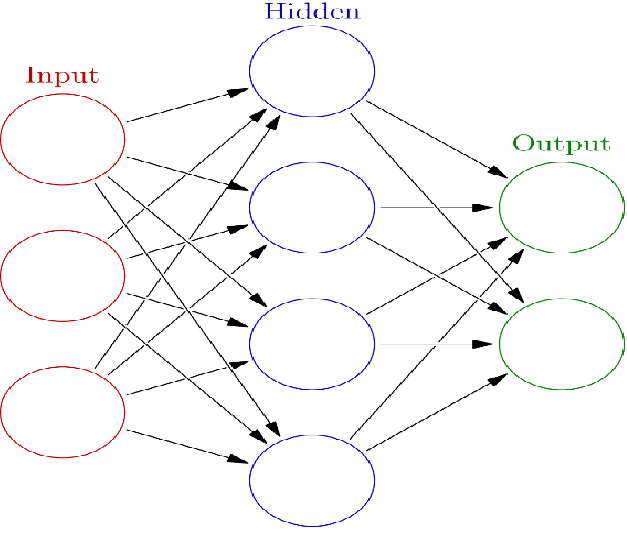

<br><br>


3 types of neural networks:

1.) Feedforward algorithm - moves directly from input to output

2.) Backpropogation algorithm - assigns ranks to multiple paths from each node, then moves backward to adjust rankings according to degree of error

3.) Convolutional Neural Networks (CNNs) - each layer performs a function towards a specific feature in the data

4.) Recurrent Neural Networks (RNNs) - meant for sequential data (time-dependent data that is influenced by previous data)

###Structure of a PyTorch Model

If you remember our first workshop, you might remember that we defined our MLP classifier in just 1 line using sklearn: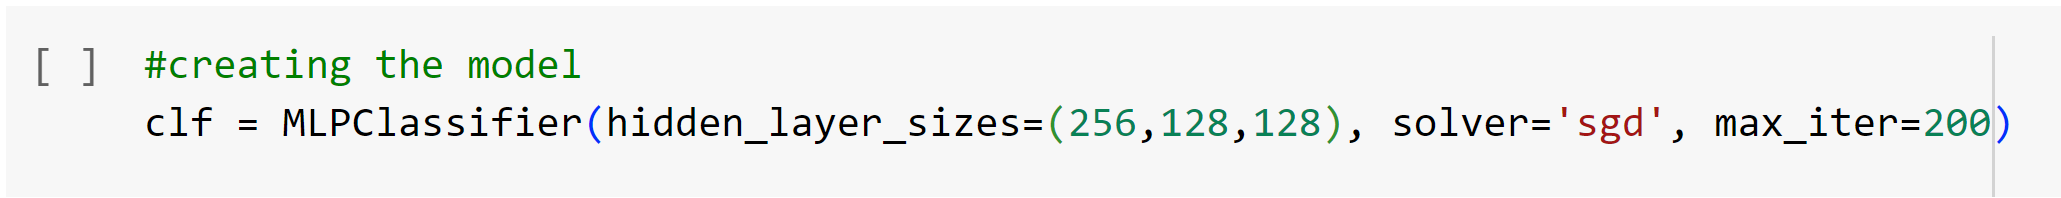

One of PyTorch's greatest advantages is that we can go beyond simple parameters and actually define each layer and layer type in addition to other components. We can also define exactly how the model should proceed with the order of computation.

In [ ]:
class NeuralNetwork(nn.Module):

  ## The init function is basically a constructor for our neural network
  def __init__(self):
    super().__init__()

    self.flattened = nn.Flatten()

    self.l1 = torch.nn.Linear(29, 64) #matrix multiplication: ensure the m of mxn l1 matrix is the same size as n of mxn input matrix
    self.l2 = torch.nn.Linear(64, 128)
    self.act = torch.nn.ReLU() #activation function
    #self.double()

  ## Forward method does the actual computations, returns the output
  ## x represents the data we're passing to the model
  def forward(self, x):
    x = self.l1(x)
    x = self.act(x)
    x = self.l2(x)

    return x

  ## After this, the next step is to create a training loop to train our model and subsequently test its predictions.